In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('dataR2.csv')
y = df.iloc[0:115,9].values
X = df.iloc[0:115,0:8].values 
pd.set_option("display.max_rows", 20, "display.max_columns", None)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=1 , stratify = y)

In [4]:
from sklearn.model_selection import train_test_split
X_tt, X_validation , y_tt , y_validation = train_test_split(X_train , y_train , test_size = 0.15 , random_state=1 , stratify = y_train)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tt)
X_t_std = sc.transform(X_tt)
X_v_std = sc.transform(X_validation)

Provo a fare plot delle varie features a 2 a 2

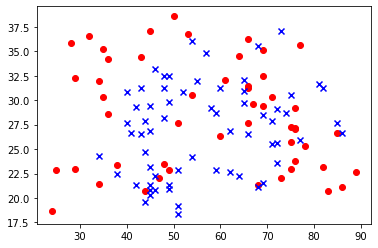

No handles with labels found to put in legend.


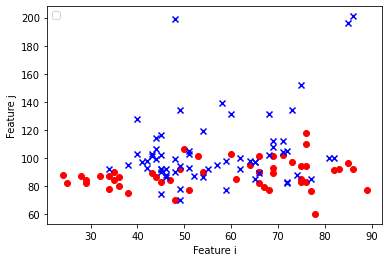

No handles with labels found to put in legend.


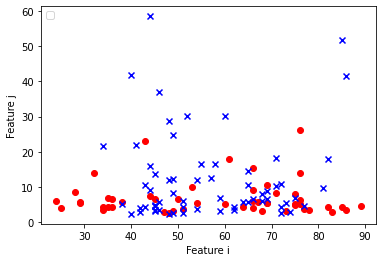

No handles with labels found to put in legend.


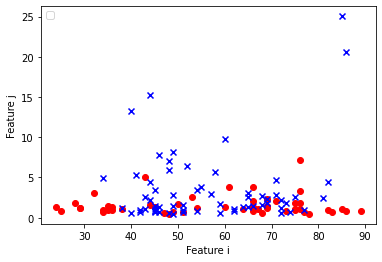

No handles with labels found to put in legend.


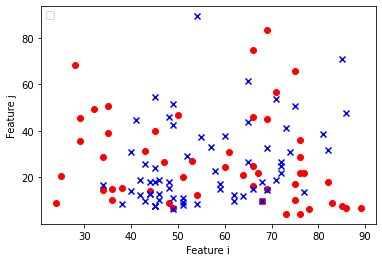

No handles with labels found to put in legend.


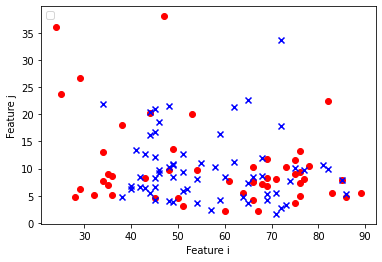

No handles with labels found to put in legend.


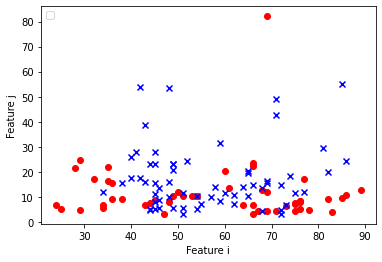

No handles with labels found to put in legend.


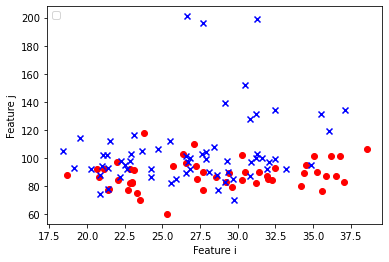

No handles with labels found to put in legend.


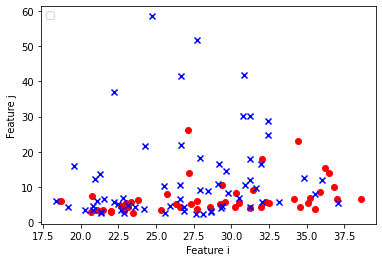

No handles with labels found to put in legend.


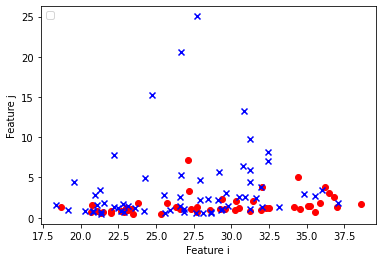

No handles with labels found to put in legend.


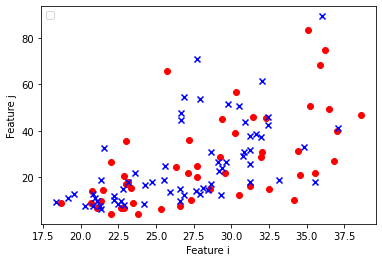

No handles with labels found to put in legend.


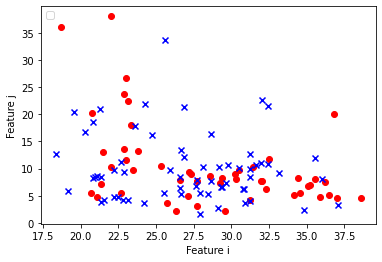

No handles with labels found to put in legend.


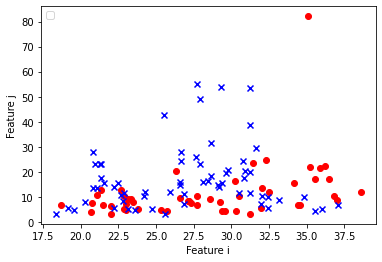

No handles with labels found to put in legend.


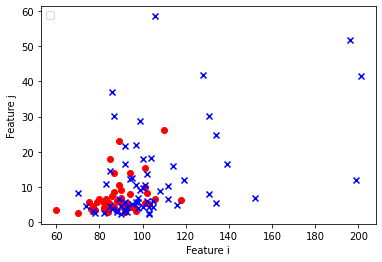

No handles with labels found to put in legend.


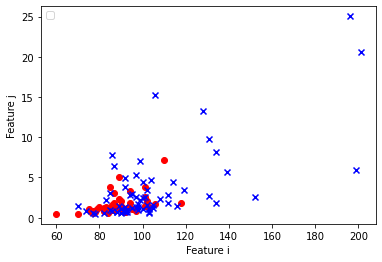

No handles with labels found to put in legend.


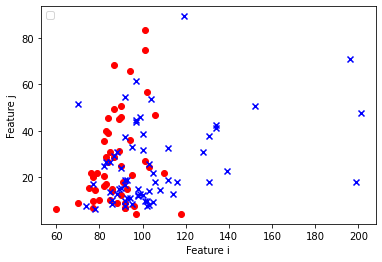

No handles with labels found to put in legend.


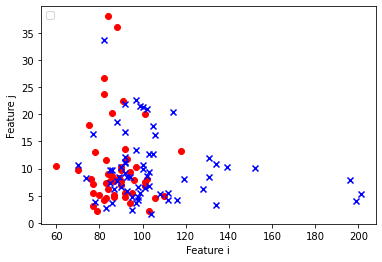

No handles with labels found to put in legend.


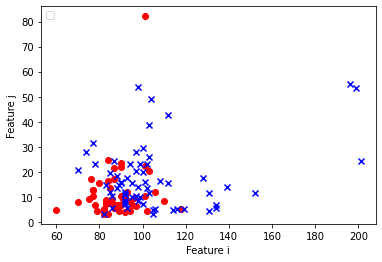

No handles with labels found to put in legend.


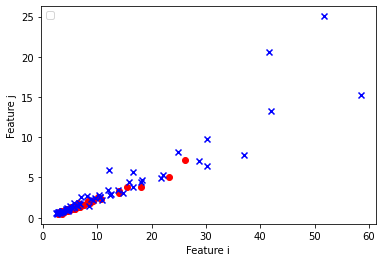

No handles with labels found to put in legend.


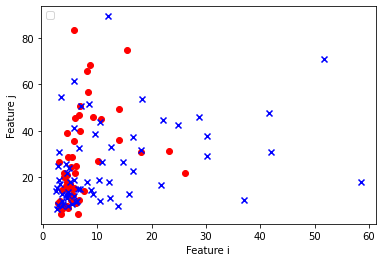

No handles with labels found to put in legend.


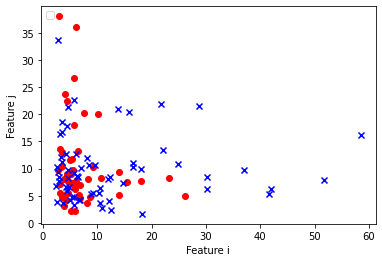

No handles with labels found to put in legend.


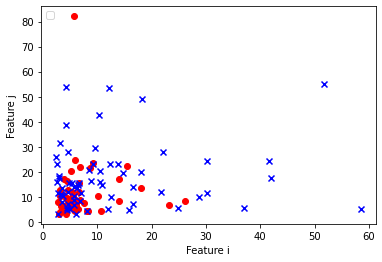

No handles with labels found to put in legend.


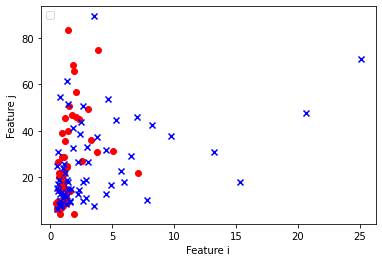

No handles with labels found to put in legend.


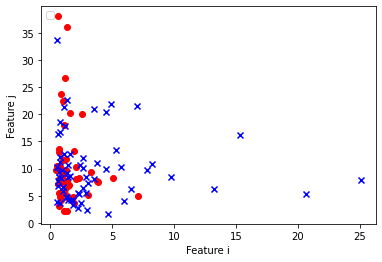

No handles with labels found to put in legend.


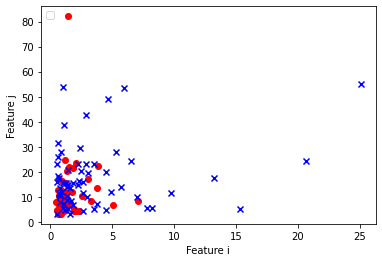

No handles with labels found to put in legend.


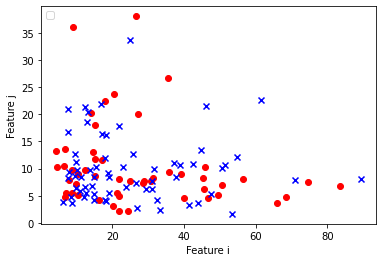

No handles with labels found to put in legend.


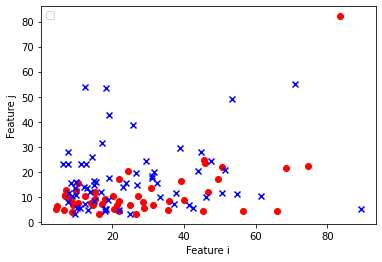

No handles with labels found to put in legend.


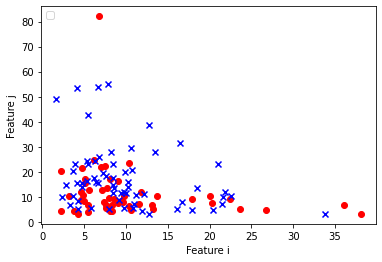

No handles with labels found to put in legend.


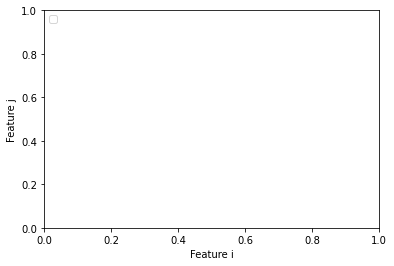

In [11]:
import matplotlib.pyplot as plt
for i in range(8):
    for j in range(i,8):
        if i!=j:
            plt.scatter(X[:51 , i] , X[:51 , j], color='red', marker='o', label='Tipologia 1')
            plt.scatter(X[51:115, i], X[51:115, j], color='blue', marker='x' , label='Tipologia 2')
            plt.show()
            plt.xlabel('Feature i')
            plt.ylabel('Feature j')
            plt.legend(loc='upper left')
            
#not sure if it is working...


Devo adesso fare una divisione su vari neuroni fatti, qundi li provo in ordine.


Percettrone:

In [18]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
accuracy = []
for epoche in range(10 , 1000 , 50):
    a = []
    for eta in [10**i for i in range(-6 , 1)]:
        ppn = Perceptron(max_iter = epoche , eta0 = eta , random_state = 1)
        ppn.fit(X_t_std , y_tt)
        y_pred = ppn.predict(X_v_std)
        b = accuracy_score(y_validation , y_pred)
        a.append( b )
    accuracy.append( a )

maxx = np.max(accuracy)
print(maxx)


C:\Users\jb5nn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\jb5nn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\jb5nn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7857142857142857


Provo adesso altri classificatori, ma senza andarmi a fare delle matrici di accuracy

KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5 , p = 2 , metric = 'minkowski')
knn.fit(X_t_std , y_tt)
y_pred_knn = knn.predict(X_v_std)
y_pred_knn_train = knn.predict(X_t_std)

print(accuracy_score(y_validation , y_pred_knn))
print(accuracy_score(y_tt , y_pred_knn_train))


0.6428571428571429
0.8461538461538461


SVM

In [22]:
from sklearn.svm import SVC
svm = SVC(C = 1 , gamma = 'auto')
svm.fit(X_t_std , y_tt)
y_pred_svm = svm.predict(X_v_std)
y_pred_svm_train = svm.predict(X_t_std)

print(accuracy_score(y_validation , y_pred_svm))
print(accuracy_score(y_tt , y_pred_svm_train))


0.7857142857142857
0.8589743589743589


RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=3000, 
    random_state=1, n_jobs=2 , max_depth=3)
forest.fit(X_t_std , y_tt)
y_pred_forest = forest.predict(X_v_std)
y_pred_forest_train = forest.predict(X_t_std)

print(accuracy_score(y_validation , y_pred_forest))
print(accuracy_score(y_tt , y_pred_forest_train))


0.5
0.9487179487179487
